In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torchvision
import torchvision.datasets as datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import sklearn.metrics

In [ ]:
train_data=datasets.MNIST(root ='./data',train=True,download=True,transform=None)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [ ]:
len(train_data)

60000

In [130]:
X_train=train_data.train_data.numpy()
X_train

/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:62: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [131]:
test_data=datasets.MNIST(root ='./data',train=False,download=True,transform=None)
len(test_data)

10000

In [132]:
X_test=test_data.test_data.numpy()
X_test

/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:67: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")


array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [133]:
# change the labels to numpy
Y_train = train_data.train_labels.numpy()
Y_test = test_data.test_labels.numpy()

/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:52: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:57: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


# QUESTION 1

## Part a

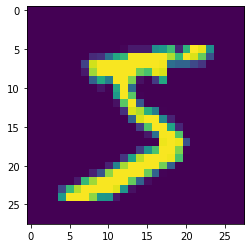

In [ ]:
plt.imshow(X_train[0])

In [ ]:
Y_train[0]

5


**We see that the number from image matches our y_train label ie 5. This matches with the first element of Y_train**

## Part b

In [134]:
X_train.shape

(60000, 28, 28)

In [135]:
X_test.shape

(10000, 28, 28)

In [136]:
Xtrain_li=[]
from sklearn.preprocessing import MinMaxScaler
#fit1=scaler.fit(data)

    #print(scaler1.transform(X_train[0]))
for i in range(60000):
    scaler1=MinMaxScaler()
    scaler1.fit(X_train[i])
    Xtrain_li.append(scaler1.transform(X_train[i]))

In [137]:
#Xtrain_=np.array(Xtrain_li)
#Xtrain.shape

In [138]:
Xtest_li=[]
from sklearn.preprocessing import MinMaxScaler
#fit1=scaler.fit(data)

    #print(scaler1.transform(X_train[0]))
for i in range(10000):
    scaler2=MinMaxScaler()
    scaler2.fit(X_test[i])
    Xtest_li.append(scaler2.transform(X_test[i]))

In [139]:
Xtrain_li[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [140]:
Xtest_li[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [142]:
Xtrain_li=np.array(Xtrain_li)
#Xtrain_li.shape

In [143]:
Xtest_li=np.array(Xtest_li)
#test_li.shape

**The dimension of X_train are (60000, 28, 28) and dimension of X_test are (10000, 28, 28)** . We also normalized the above values by using Min-Max Scalar

# Part c

In [ ]:
Y_train_onehot=pd.get_dummies(Y_train, prefix='Y')
Y_train_onehot

,Y_0,Y_1,Y_2,Y_3,Y_4,Y_5,Y_6,Y_7,Y_8,Y_9
0,0,0,0,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,1,0
59996,0,0,0,1,0,0,0,0,0,0
59997,0,0,0,0,0,1,0,0,0,0
59998,0,0,0,0,0,0,1,0,0,0


In [ ]:
Y_test_onehot=pd.get_dummies(Y_test, prefix='Y')
Y_test_onehot

,Y_0,Y_1,Y_2,Y_3,Y_4,Y_5,Y_6,Y_7,Y_8,Y_9
0,0,0,0,0,0,0,0,1,0,0
1,0,0,1,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
9995,0,0,1,0,0,0,0,0,0,0
9996,0,0,0,1,0,0,0,0,0,0
9997,0,0,0,0,1,0,0,0,0,0
9998,0,0,0,0,0,1,0,0,0,0


One-Hot Encoding is a popular technique for treating categorical variables. It simply creates additional features based on the number of unique values in the categorical feature.It is the process of creating dummy variables. Some of its advantages are
<br> 
1. Unlike Label Encoding where each after labelling each number has a rank, One hot encoding ensures that our categorical variables are unordered ie one value is not prefered over the other <br> 
2. Makes our categorical variable useful by giving it a numerical value which can now be used by a machine learning model. <br> 
3. One hot encoding makes rescaling our data easier


# QUESTION 2

In [ ]:
x_train_flat=np.zeros((Xtrain_li.shape[0],Xtrain_li[0].flatten().shape[0]))
x_test_flat=np.zeros((Xtest_li.shape[0],Xtest_li[0].flatten().shape[0]))

In [ ]:
for i in range(X_train.shape[0]):
    x_train_flat[i]=X_train[i].flatten()
for i in range(X_test.shape[0]):
    x_test_flat[i]=X_test[i].flatten()

In [ ]:
x_train_flat.shape

(60000, 784)

# MODEL 1- KNN

the K-nearest neighbors algorithm (k-NN) is a non-parametric supervised learning . It is used for classification and regression. It includes advantages Ease interpretation of output,Calculation time is faster
and has a Predictive Power.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torchvision
import torchvision.datasets as datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import sklearn.metrics
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score


In [ ]:
knn=KNeighborsClassifier()
knn.fit(x_train_flat,Y_train)

KNeighborsClassifier()

In [ ]:
predicted_first_knn=knn.predict(x_test_flat)

In [ ]:
print("test error:",1-accuracy_score(Y_test,predicted_first_knn))

test error: 0.031200000000000006


**Using KNN without any Hyperparameter tuning and only using default parameters the error rate is 0.03 ie 3% which is less than the benchmark of 5%**

# MODEL2- AdaBoost.M1 / C4.5

AdaBoost is one of the first boosting algorithms to be adapted in solving practices. Adaboost helps you combine multiple “weak classifiers” into a single “strong classifier”. We will now try differenHyperparameters which will help in bringing our model close to the benchmark Adaboost Error rate

## Trying out different Parameters

## ALGORITHM

#### Algorithm SAMME

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [ ]:
ada_1_1= AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),algorithm='SAMME')

In [ ]:
ada_1_1.fit(x_train_flat,Y_train)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(max_depth=1))

In [ ]:
predicted_ada_1_1=ada_1_1.predict(x_test_flat)
print("test error:",1-accuracy_score(Y_test,predicted_ada_1_1))

test error: 0.4244


### Algorthm SAMME.R which is default algorithm

In [ ]:
ada_1_2= AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1))
ada_1_2.fit(x_train_flat,Y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1))

In [ ]:
predicted_ada_1_2=ada_1_2.predict(x_test_flat)
print("test error:",1-accuracy_score(Y_test,predicted_ada_1_2))

test error: 0.2701


Hence out of these both we see SAMME.R which is the default is giving a lower test error . So we will us that

## LEARNING RATES

In [ ]:
for i in np.arange(0.1, 2.1, 0.4):
   ada_2= AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),learning_rate=i)
   
   ada_2.fit(x_train_flat,Y_train)
   predicted_ada_2=ada_2.predict(x_test_flat)
   print("test error with learning rate ",i, 'iteration' ,1-accuracy_score(Y_test,predicted_ada_2))

test error with learning rate  0.1 iteration 0.27349999999999997
test error with learning rate  0.5 iteration 0.2229
test error with learning rate  0.9 iteration 0.25260000000000005
test error with learning rate  1.3000000000000003 iteration 0.2831
test error with learning rate  1.7000000000000002 iteration 0.4133


Hence here we see that learning rate of 0.5 gives us the least error . Hence we will be using that going forward

### TUNING THE TREES

In [ ]:
for i in range(1,10,2):
  ada_3= AdaBoostClassifier( DecisionTreeClassifier(max_depth=i),learning_rate=0.5)
  ada_3.fit(x_train_flat,Y_train)
  predicted_ada_3=ada_3.predict(x_test_flat)
  print("test error with descision tree number of tree ",i, 'iteration' ,1-accuracy_score(Y_test,predicted_ada_3))

test error with descision tree number of tree  1 iteration 0.2229
test error with descision tree number of tree  3 iteration 0.11280000000000001
test error with descision tree number of tree  5 iteration 0.09330000000000005
test error with descision tree number of tree  7 iteration 0.07709999999999995
test error with descision tree number of tree  9 iteration 0.05889999999999995


Hence the best model which comes closest to the benchamark test error is with AdaBoostClassifier( DecisionTreeClassifier(max_depth=9),learning_rate=0.5)

#### FINAL MODEL OF ADA BOOST

In [ ]:
ada_4= AdaBoostClassifier( DecisionTreeClassifier(max_depth=9),learning_rate=0.5)
ada_4.fit(x_train_flat,Y_train)
predicted_ada_4=ada_4.predict(x_test_flat)


In [ ]:
1-accuracy_score(Y_test,predicted_ada_4)

0.054400000000000004


**Hence the best model which comes closest to the benchamark test error 0.0405 is with AdaBoostClassifier( DecisionTreeClassifier(max_depth=9),learning_rate=0.5) which gave an error rate of 0.0544**

# MODEL 3: SVM with Gaussian Kernel

Support vector machines (SVMs) are a set of supervised learning methods used for classification, regression and outliers detection. We will be using SVM with Gaussian Kernel and try to bring error rate close to benchmark error rate by hyperparameter tuning

### SVM with gaussian kernel default values

In [ ]:
from sklearn import svm
from sklearn.metrics import accuracy_score

In [ ]:
from sklearn import svm
svm1 = svm.SVC(kernel='rbf')
svm1.fit(x_train_flat, Y_train)
1-svm1.score(x_test_flat, Y_test)

0.02080000000000004

This is still a high value as compared to our error rate of 0.014.Hence we keep continuing the tuning

## Parameter C

In [126]:
for i in [0.1, 1, 10, 100, 1000]:
   svm_2= svm.SVC(kernel='rbf',C=i)
   #AdaBoostClassifier(learning_rate=i)
   svm_2.fit(x_train_flat,Y_train)
   predicted_ada_2=svm_2.predict(x_test_flat)
   print("test error with C ",i, 'iteration' ,1-accuracy_score(Y_test,predicted_ada_2))

test error with C  0.1 iteration 0.04049999999999998
test error with C  1 iteration 0.02080000000000004
test error with C  10 iteration 0.01629999999999998
test error with C  100 iteration 0.016700000000000048
test error with C  1000 iteration 0.016700000000000048


Hence this SVM model with kernel='rbf' and c=10 gives the lowest balue with erroR=0.016

### FINAL SVM with Gaussian model

In [128]:
svm_3= svm.SVC(kernel='rbf',C=10)
   #AdaBoostClassifier(learning_rate=i)
svm_3.fit(x_train_flat,Y_train)
predicted_svm_3=svm_3.predict(x_test_flat)

In [129]:
1-accuracy_score(Y_test,predicted_svm_3)

0.01629999999999998

 **Hence this SVM model with kernel='rbf' and c=10 gives the lowest value with error 0.016 which is close to the benchmark of 0.014**

# Q2 PART B

Here we try to find a classifer which gives a lower error rate than all case of part a. For this we will be using CNN. Convolutional Neural Network is a Deep Learning algorithm specially designed for working with Images and videos. It takes images as inputs, extracts and learns the features of the image, and classifies them based on the learned featur

# CNN 

In [ ]:
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(10, activation='softmax'))
	# compile model
	opt = SGD(learning_rate=0.01, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model

In [ ]:
# save the final model to file
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
 

trainX_2 = Xtrain_li.reshape((Xtrain_li.shape[0], 28, 28, 1))
testX_2 = Xtest_li.reshape((Xtest_li.shape[0], 28, 28, 1))
	# one hot encode target values
trainY_2 = to_categorical(Y_train)
testY_2 = to_categorical(Y_test)

In [ ]:
model2= define_model()
	# fit model
model2.fit(trainX_2, trainY_2, epochs=10, batch_size=32, verbose=10)

Epoch 1/10
Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10


In [ ]:
_, acc_nn = model2.evaluate(testX_2, testY_2, verbose=10)

In [ ]:
1-acc_nn

0.00830000638961792

In [ ]:
model2.save('final_model_CNN.h5')

 **Hence our CNN gives us a test error of 0.0083 which is lower than the test errors we got in Part a**

## References
1. https://scikit-learn.org/stable/modules/svm.html#:~:text=Support%20vector%20machines%20(SVMs)%20are,than%20the%20number%20of%20samples.

2. https://www.analyticsvidhya.com/blog/2021/08/beginners-guide-to-convolutional-neural-network-with-implementation-in-python/

3. https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-from-scratch-for-mnist-handwritten-digit-classification/

